In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [104]:
class PeakDetectPatient:
    def __init__(self, patient_id="03", root_path="NAVA_original/000_CNN_PeakDetectionData/"):
        self.patient_id = patient_id
        self.root_path = root_path
        self.all_os_paths = self.collect_os_paths_of_patient_data()
        self.peak_review_dict = self.get_peak_review_data()
        self.edi_sample_data_dict = self.get_edi_sample_data()
        self.edi_flow_pressure_data_dict = self.get_edi_flow_pressure_data()

        # self.check_missingness()
    
    def find_data_start_row(self, os_path, threshold=0.5):
        """
        Find the first row in an Excel file where data actually starts.
        Reads the file and finds the first row where at least 'threshold' fraction
        of columns have non-null values.
        """
        # Read the file without skipping rows to inspect all rows
        df_temp = pd.read_excel(os_path, header=None)
        
        # Find the first row where at least 'threshold' of columns are non-null
        # This row is likely the header or first data row
        for idx in range(len(df_temp)):
            non_null_ratio = df_temp.iloc[idx].notna().sum() / len(df_temp.columns)
            if non_null_ratio >= threshold:
                return idx
        
        # If no row meets the threshold, return 0 (start from beginning)
        return 0

    def collect_os_paths_of_patient_data(self):
        # go through the root path and collect os paths that starts with "edi-{patient_id}-"
        all_os_paths = []
        print(f"collecting xlsx files that starts with 'edi-{self.patient_id}-'")
        for root, dirs, files in os.walk(self.root_path):
            for file in files:
                if file.startswith(f"edi-{self.patient_id}"):
                    all_os_paths.append(os.path.join(root, file))
                if file.startswith(f"{self.patient_id}_raw"):
                    all_os_paths.append(os.path.join(root, file))
        all_os_paths.sort()
        print(f"Found {len(all_os_paths)} files for patient {self.patient_id}")
        print(all_os_paths)
        return all_os_paths

    def get_peak_review_data(self):
        # get the peak review data from the os path
        # find file that is inside Edi_peak_review folder
        peak_review_data_dict = {}
        for os_path in self.all_os_paths:
            if "Edi_peak_review" in os_path:
                st_peak_review_data = pd.read_excel(os_path, index_col=0, sheet_name="ST")
                bbb_peak_review_data = pd.read_excel(os_path, index_col=0, sheet_name="BbB")
                print(f"reading {os_path}")
                print(f"servotracker_peak_review_data shape: {st_peak_review_data.shape}")
                print(f"BbB_peak_review_data shape: {bbb_peak_review_data.shape}")
                peak_review_data_dict['ST'] = st_peak_review_data
                peak_review_data_dict['BbB'] = bbb_peak_review_data
                print("="*100)
                return peak_review_data_dict

    def get_edi_sample_data(self):
        edi_sample_data_dict = {}
        count = 1 # count=1 because file name starts with 1
        for os_path in self.all_os_paths:
            if "Edi_sample" in os_path:
                print(f"reading {os_path}")
                edi_sample_data_dict[count] = pd.read_excel(os_path, index_col=0)
                print(f"edi_sample_data_dict[{count}] shape: {edi_sample_data_dict[count].shape}")
                count += 1
        print("="*100)
        return edi_sample_data_dict
    
    def get_edi_flow_pressure_data(self):
        edi_flow_pressure_data_dict = {}
        count = 1 # count=1 because file name starts with 1
        for os_path in self.all_os_paths:
            if "Edi-flow_pressure_sample" in os_path:
                print(f"reading {os_path}")
                # Find the first row with actual data (no missing values)
                start_row = self.find_data_start_row(os_path)
                print(f"  Data starts at row {start_row} (skipping {start_row} metadata rows)")
                
                # Read the file, skipping metadata rows
                # The first non-skipped row will be treated as header by pandas
                if start_row > 0:
                    df = pd.read_excel(os_path, skiprows=range(start_row))
                else:
                    df = pd.read_excel(os_path)
                
                edi_flow_pressure_data_dict[count] = df
                print(f"edi_flow_pressure_data_dict[{count}] shape: {edi_flow_pressure_data_dict[count].shape}")
                count += 1
        print("="*100)
        return edi_flow_pressure_data_dict
        
    def check_missingness(self):# check if there is missingness in the peak_review_dict['ST']
        print(f"Missingness in ST: {self.peak_review_dict['ST'].isnull().sum()}")
        print(f"Missingness in BbB: {self.peak_review_dict['BbB'].isnull().sum()}")

        for key in self.edi_sample_data_dict.keys():
            print(f"Missingness in {key}: {self.edi_sample_data_dict[key].isnull().sum()}")
        for key in self.edi_flow_pressure_data_dict.keys():
            print(f"Missingness in {key}: {self.edi_flow_pressure_data_dict[key].isnull().sum()}")


In [106]:
patient_id = "03"
root_path = "../../NAVA_original/000_CNN_PeakDetectionData/"

patient_data = PeakDetectPatient(patient_id, root_path)


collecting xlsx files that starts with 'edi-03-'
Found 9 files for patient 03
['../../NAVA_original/000_CNN_PeakDetectionData/Edi-flow_pressure_sample/03/03_raw-1.xlsx', '../../NAVA_original/000_CNN_PeakDetectionData/Edi-flow_pressure_sample/03/03_raw-2.xlsx', '../../NAVA_original/000_CNN_PeakDetectionData/Edi-flow_pressure_sample/03/03_raw-3.xlsx', '../../NAVA_original/000_CNN_PeakDetectionData/Edi-flow_pressure_sample/03/03_raw-4.xlsx', '../../NAVA_original/000_CNN_PeakDetectionData/Edi_peak_review/edi-03_ST vs. BbB.xlsx', '../../NAVA_original/000_CNN_PeakDetectionData/Edi_sample/03/edi-03-raw-1.xlsx', '../../NAVA_original/000_CNN_PeakDetectionData/Edi_sample/03/edi-03-raw-2.xlsx', '../../NAVA_original/000_CNN_PeakDetectionData/Edi_sample/03/edi-03-raw-3.xlsx', '../../NAVA_original/000_CNN_PeakDetectionData/Edi_sample/03/edi-03-raw-4.xlsx']
reading ../../NAVA_original/000_CNN_PeakDetectionData/Edi_peak_review/edi-03_ST vs. BbB.xlsx
servotracker_peak_review_data shape: (4772, 5)
BbB_p

In [85]:
patient_data.peak_review_dict['ST']

,Timestamp,Time (min),Edipeak,Edimin,RR
0,170,0.002833,0.40,0.30,352.941176
1,340,0.005667,0.37,0.29,375.000000
2,830,0.013833,0.31,0.13,125.000000
3,1060,0.017667,0.33,0.21,272.727273
4,1310,0.021833,0.51,0.26,250.000000
...,...,...,...,...,...
5069,3416810,56.946833,16.74,14.06,375.000000
5070,3417530,56.958833,16.09,3.64,84.507042
5071,3418270,56.971167,9.69,3.35,82.191781
5072,3418910,56.981833,16.32,2.41,95.238095


2055020 2070020
Time difference: 0.24183333333333223 minutes


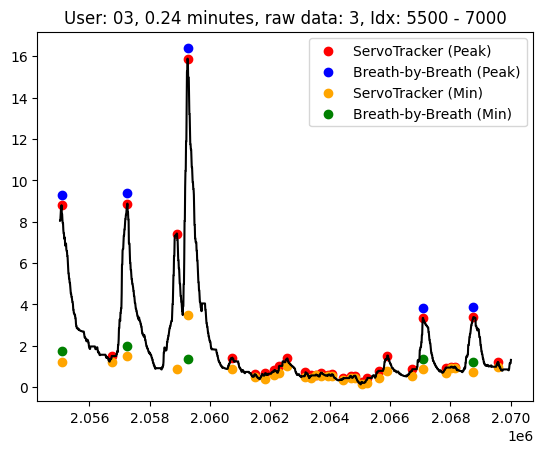

In [108]:
# Plots the Edi_sample data as line plot, with corresponding peak_review_data as scatter plot
start_idx_of_edi = 5500 
end_idx_of_edi = 7000
edi_sample_data_dict_key = 3 # raw Edi data dict key number. 1 will load XX_raw-1.xlsx from user XX.

# now get the Timestamp of edi_sample_data_dict
start_timestamp_of_edi = patient_data.edi_sample_data_dict[edi_sample_data_dict_key]['Timestamp'].iloc[start_idx_of_edi]
end_timestamp_of_edi = patient_data.edi_sample_data_dict[edi_sample_data_dict_key]['Timestamp'].iloc[end_idx_of_edi]


print(start_timestamp_of_edi, end_timestamp_of_edi)

# get subset of peak_review_dict['ST']
isin_timestamp_st = patient_data.peak_review_dict["ST"]['Timestamp'].isin(patient_data.edi_sample_data_dict[edi_sample_data_dict_key]['Timestamp'].iloc[start_idx_of_edi:end_idx_of_edi])
subset_peak_review_df_st = patient_data.peak_review_dict["ST"][isin_timestamp_st]

# calculate the Actual time difference between two timestamps.
time_diff =  subset_peak_review_df_st['Time (min)'].iloc[-1] - subset_peak_review_df_st['Time (min)'].iloc[0]   
print(f"Time difference: {time_diff} minutes")


# get subset of peak_review_dict['BbB']
isin_timestamp_bbb = patient_data.peak_review_dict["BbB"]['Timestamp'].isin(patient_data.edi_sample_data_dict[edi_sample_data_dict_key]['Timestamp'].iloc[start_idx_of_edi:end_idx_of_edi])
subset_peak_review_df_bbb = patient_data.peak_review_dict["BbB"][isin_timestamp_bbb]

plt.plot(patient_data.edi_sample_data_dict[edi_sample_data_dict_key]['Timestamp'].iloc[start_idx_of_edi:end_idx_of_edi], patient_data.edi_sample_data_dict[edi_sample_data_dict_key]['Edi'].iloc[start_idx_of_edi:end_idx_of_edi], color="black")

y_buffer = 0.5
plt.title(f"User: {patient_id}, {time_diff:.2f} minutes, raw data: {edi_sample_data_dict_key}, Idx: {start_idx_of_edi} - {end_idx_of_edi}")
plt.scatter(subset_peak_review_df_st['Timestamp'], subset_peak_review_df_st['Edipeak'], color="red", label="ServoTracker (Peak)")
plt.scatter(subset_peak_review_df_bbb['Timestamp'], subset_peak_review_df_bbb['Edipeak'] + y_buffer, color="blue", label="Breath-by-Breath (Peak)")

plt.scatter(subset_peak_review_df_st['Timestamp'], subset_peak_review_df_st['Edimin'], color="orange", label="ServoTracker (Min)")
plt.scatter(subset_peak_review_df_bbb['Timestamp'], subset_peak_review_df_bbb['Edimin'] + y_buffer, color="green", label="Breath-by-Breath (Min)")


# What is RR?
# plt.scatter(subset_peak_review_df_st['Timestamp'],subset_peak_review_df_st['RR'])
plt.legend()
plt.show()

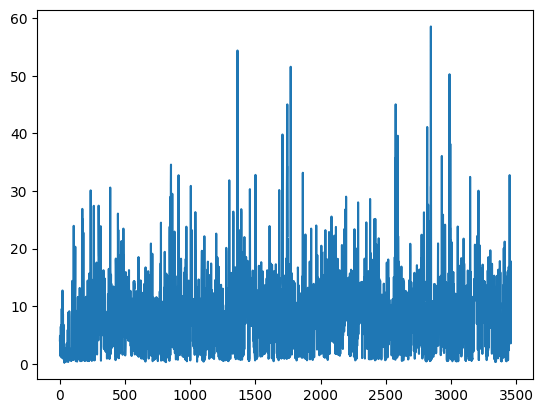

In [5]:
plt.plot(patient_data.peak_review_data['Edipeak'])

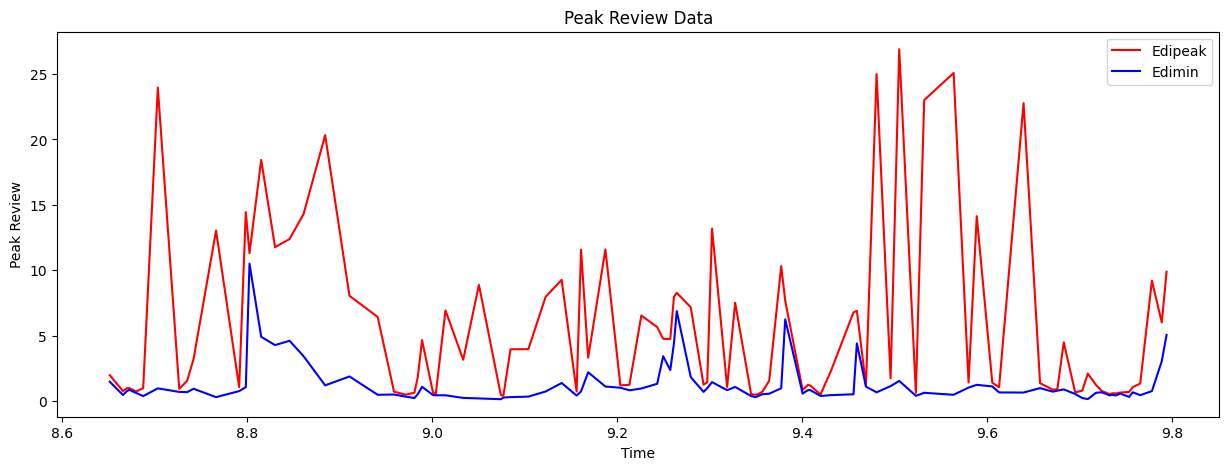

In [6]:
# PLot peak_review_data
plt.figure(figsize=(15, 5))
plt.plot(patient_data.peak_review_data['Time (min)'][100:200], patient_data.peak_review_data["Edipeak"][100:200], color="red")
plt.plot(patient_data.peak_review_data['Time (min)'][100:200], patient_data.peak_review_data["Edimin"][100:200], color="blue")
plt.legend(["Edipeak", "Edimin"])
plt.title("Peak Review Data")
plt.xlabel("Time")
plt.ylabel("Peak Review")
plt.show()

In [7]:
patient_data.edi_sample_data_dict[1].head()

,Timestamp,Time (min),Edi
0,467350,7.789167,3.05
1,467360,7.789333,3.63
2,467370,7.789500,3.63
3,467380,7.789667,4.34
4,467390,7.789833,4.34


In [8]:
patient_data.edi_flow_pressure_data_dict[1]

,%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,%% DEVICE INFO:,NaN,NaN,NaN,NaN,NaN,NaN
1,%% Device Type: SERVO-n0,NaN,NaN,NaN,NaN,NaN,NaN
2,%% System Version: 1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,%% Sampling Time: 010,NaN,NaN,NaN,NaN,NaN,NaN
4,"%% Device System SW version: SERVO-n,0.841.40268",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
53238,999960,103221,-5.3,5.4,0,1.18,48
53239,999970,103222,-5,5.3,0,1.18,48
53240,999980,103223,-3.8,5.2,0,1.18,48
53241,999990,103224,-2.3,5.1,0,1.18,48
